In [1]:
''#pip install pytest-shutilq
#pip install python-utils
#pip install utils
#pip install --user -U nltk
#pip install collection
#pip install regex
#pip install torch
#pip install gensim
#!pip install numpy

In [4]:
id = ['subjectid:']
admissionDate = ['data admission date:']
dischargeDate = ['discharge date:']
diagnoses = ['review:', 'condition:', 'comparison:', 'technique:', 'findings:', 'service:', 'comments:', 'addendum:', 'results:', 'radiologic studies:', ' head ct:', 'abdominal ct:', 'physical exam at time of admission:', 'brief summary of hospital course:', 'final diagnoses:', 'physical exam:', 'brief hospital course:', 'impression:', 'discharge diagnosis:', 'arousal / attention / cognition / communication:', 'total distance walked:', 'minutes:', 'pulmonary status:', 'integumentary / vascular:', 'sensory integrity:', ' pain / limiting symptoms:', 'motor function:', ' functional status:', 'gait, locomotion:', 'gait:', 'locomotion', 'rolling:', 'sidelying to sit:', 'transfer:', 'sit to stand:', 'ambulation:', 'stairs:', 'balance:', 'communication:', 'education / communication: pt ed:', 'diagnosis:', 'clinical impression / prognosis:', 'primary:', 'secondary:', 'pertinent results:', 'test:', 'interpretation:', 'findings:', 'general comments:', 'conclusions:', 'assessment:', 'action:', 'response:', ' general appearance:', 'head, ears, nose, throat:', 'cardiovascular:', 'peripheral vascular:', 'vascular:', 'respiratory / chest:', 'respiratory/chest:', 'respiratory:', 'chest:', 'abdominal:', 'extremities:', 'musculoskeletal:', 'skin:', 'neurologic:', 'exam:', 'diagnoses:', 'vascular:', 'course:', 'comments:', 'prognosis:', 'impression:', 'appearance:' , 'admission:' , 'head:' , 'ears:' , 'nose:' , 'throat:', 'results:', 'stand:', 'sit:', 'admission:']
history = ['history of present illness:', 'past medical history:', 'family history:', 'social history:', 'social history:', 'family history:', 'social / occupational history:', 'living environment:']
end = ['dictated by:', 'd:', 't:', 'job#:']
dob = ['date of birth:']
sex = ['sex']
medicine = ['medications on admission:', 'antibiotics:', 'infusions:', 'other intensive care unit medications:', 'unit medications:']
allergies = ['allergies', 'reactions:']
lab = ['laboratory studies:', 'labs at discharge:']
dischargeCondition = ['discharge condition:', 'discharge disposition:']
dischargeStatus = ['discharge status:']
dischargeMedication = ['discharge medications:']
instructions = ['follow-up plans:', ' plan:']
vitals = ['vitals:', 'bp', 'p', 'weight (lb):', 'bsa (m2):', 'bp (mm hg):', 'hr (bpm):', 'patient/test information:', 'indication:', 'height:', ' tmax:', ' tcurrent:', 'hr:', 'bp:', 'rr:', 'spo2:', 'heart rhythm:', 'total in:', 'po:', 'tf:', 'ivf:', 'blood products:', 'total out:', 'urine:', 'ng:', 'stool:', 'drains:', 'balance:', 'o2 delivery device:', 'spo2:', 'abg:']
place = ['office for:', 'facility:', '']           
chief = ['chief complaint:']
surgery = ['major surgical or invasive procedure:', 'invasive procedure:', 'major surgical', 'surgical', 'post surgical physical exam:']
status = ['mental status:', 'level of consciousness:', 'activity status:']



In [ ]:
pip install glove_python

In [18]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Afam\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import csv
import os
#print(os.getcwd())
os.chdir(r"C:\Users\Afam\Desktop\Machine Learning")


import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#from nltk.stem.porter import PorterStemmer
import utils as ut
import re
import collections
from collections import Counter
import random
import numpy as np
import torch
from torch import nn
import torch.optim as optim

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


from sklearn.metrics import accuracy_score, f1_score
from sklearn import utils
from tqdm import tqdm
import multiprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import transformers as ppb
import warnings
#warnings.filterwarnings('ignore')

C:\Users\Afam\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Afam\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org

In [3]:
'''#Already done hence no need to repeat
with open('NOTEEVENTS.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        newfile = open('clinical.txt','a')
        newfile.write(row[10].replace('\x00', ''))
        newfile.close()   '''

"#Already done hence no need to repeat\nwith open('NOTEEVENTS.csv') as csv_file:\n    csv_reader = csv.reader(csv_file, delimiter=',')\n    for row in csv_reader:\n        newfile = open('clinical.txt','a')\n        newfile.write(row[10].replace('\x00', ''))\n        newfile.close()   "

In [4]:
# read in the extracted text file      
with open('clinical.txt') as f:
    text = f.read()
text = text.replace("ALL", "Acute lymphoblastic leukemia")
text = text.replace("AMI", "Acute myocardial infarction")
text = text.replace("FSH", "Follicle stimulating hormone")
text = text.replace("HAPE", "High altitude pulmonary edema")
text = text.replace("HPS", "Hantavirus pulmonary syndrome")
text = text.replace("IBS", "Irritable bowel syndrome")
text = text.replace("IDDM", "Insulin dependent diabetes mellitus")
text = text.replace("MDS", "Myelo dysplastic syndrome")
text = text.replace("NBCCS", "Nevoid basal cell carcinoma syndrome")
text = text.replace("PE", "Pulmonary embolism")
text = text.replace("SIDS", "Sudden infant death syndrome")
text = text.replace("TSH", "Thyroid stimulating hormone")
text = text.replace("ACL", "Anterior cruciate ligament")
text = text.replace("AFR", "Acute renal failure")
text = text.replace("ADHD", "Attention deficit hyperactivity disorder")
text = text.replace("ADR", "Adverse drug reaction")
text = text.replace("AIDS", "Acquired immune deficiency syndrome")
text = text.replace("AKA", "Above the knee amputation")
text = text.replace("ANED", "Alive no evidence of disease")
text = text.replace("ADH", "Antidiuretic hormone")
text = text.replace("ARDS", "Acute respiratory distress syndrome")
text = text.replace("ARF", "Acute renal kidney failure")
text = text.replace("ASCVD", "Atherosclerotic cardiovascular disease")
text = text.replace("BKA", "Below the knee amputation")
text = text.replace("BMP", "Basic metabolic panel")
text = text.replace("BP", "Blood pressure")
text = text.replace("BPD", "Borderline personality disorder")
text = text.replace("BSO", "Bilateral salpingo oophorectomy")
text = text.replace("C&S", "Culture and sensitivity")
text = text.replace("C/O", "Complaint of")
text = text.replace("CABG", "Coronary artery bypass graft")
text = text.replace("CBC", "Complete blood count")
text = text.replace("CC", "Chief complaint")
text = text.replace("CDE", "Complete dental evaluation")
text = text.replace("CPAP", "Continuous positive airway pressure")
text = text.replace("COPD", "Chronic obstructive pulmonary disease")
text = text.replace('CT', ' Chemotherapy')
text = text.replace("CVA", "Cerebrovascular accident")
text = text.replace("D/C", "discharge")
text = text.replace("DC", "discharge")
text = text.replace("DCIS", "Ductal Carcinoma In Situ")
text = text.replace("DDX", "Differential diagnosis")
text = text.replace("DJD", "Degenerative joint disease")
text = text.replace("DM", "Diabetes mellitus")
text = text.replace("DNC", "Dilation and curettage")
text = text.replace("D&C", "Dilation and curettage")
text = text.replace("DNR", "Do not resuscitate")
text = text.replace("DOE", "Dyspnea on exertion")
text = text.replace("DTR", "Deep tendon reflexes")
text = text.replace("DVT", "Deep venous thrombosis")
text = text.replace("ECT", "Electroconclusive therapy")
text = text.replace("ADD", "attention deficit disorder")
text = text.replace("FX", "Fracture")
text = text.replace("GOMER", "get out of my emergency room")
text = text.replace('GVHD', 'chronic graft vs host disease')
text = text.replace("H&H", "Hemoglobin and hematocrit")
text = text.replace("H&P", "History and physical examination")
text = text.replace("H/O", "History of")
text = text.replace("HA", "Headache")
text = text.replace("HRT", "hormone replacement therapy")
text = text.replace("HTN", "Hypertension")
text = text.replace("I&D", "Incision and drainage")
text = text.replace("IBD", "Inflammatory bowel disease")
text = text.replace("ICD", "Implantable cardioverter defibrillator")
text = text.replace("ICU", "Intensive care unit")
text = text.replace("IM", "Intramuscular")
text = text.replace("IMP", "Impression")
text = text.replace("ITU", "Intensive therapy unit")
text = text.replace("IPF", "Idiopathic pulmonary fibrosis")
text = text.replace("IU", "International units")
text = text.replace("JT", "Joint")
text = text.replace("K", "Potassium")
text = text.replace("KCL", "Potassium chloride")
text = text.replace('LCIS', 'Lobular Carcinoma In Situ')
text = text.replace("LBP", "Low back pain")
text = text.replace("LLQ", "Left lower quadrant")
text = text.replace("LUQ", "Left upper quadrant")
text = text.replace("MCL", "Medial collateral ligament")
text = text.replace("M/H", "Medical history")
text = text.replace("MVP", "Mitral valve prolapse")
text = text.replace("N/V", "Nausea or vomiting")
text = text.replace("NCP", "Nursing care plan")
text = text.replace("NSR", "Normal sinus rhythm of the heart")
text = text.replace("O.D.", "Right eye")
text = text.replace("O.S.", "Left eye")
text = text.replace("O.U.", "Both eyes")
text = text.replace("ORIF", "Open reduction and internal fixation")
text = text.replace("PCL", "Posterior cruciate ligament")
text = text.replace("p.r.n.", "As needed")
text = text.replace("PD", "Progressive disease.")
text = text.replace("PERRLA", "Pupils equal, round, and reactive to light and accommodation ")
text = text.replace("PFT", "Pulmonary function test")
text = text.replace("PMI", "Point of maximum impulse of the heart when felt during examination")
text = text.replace("PMS", "Premenstrual syndrome")
text = text.replace('PT', 'Physical therapy')
text = text.replace("PTH", "Parathyroid hormone")
text = text.replace("PTSD", "Post traumatic stress syndrome")
text = text.replace("PUD", "Peptic ulcer disease")
text = text.replace("RA", "Rheumatoid arthritis")
text = text.replace("RDS", "Respiratory distress syndrome")
text = text.replace("R/O", "Rule out")
text = text.replace("REB", "Rebound")
text = text.replace("RLQ", "Right lower quadrant")
text = text.replace("ROS", "Review of systems")
text = text.replace("RUQ", "Right upper quadrant")
text = text.replace("s/p", "Status post")
text = text.replace("SAD", "Season affective disorder")
text = text.replace("SOB", "Shortness of breath")
text = text.replace("SQ", "Subcutaneous")
text = text.replace(" T ", "Temperature")
text = text.replace("T&A", "Tonsillectomy and adenoidectomy")
text = text.replace(" tab ", "Tablet")
text = text.replace("TAH", "Total abdominal hysterectomy")
text = text.replace("THR", "Total hip replacement")
text = text.replace("TKR", "Total knee replacement")
text = text.replace("TMJ", "Tempomandibular joint")
text = text.replace("UA", " Urinalysis ")
text = text.replace(" U ", "Unit ")
text = text.replace("ULN", "Upper limits of normal")
text = text.replace("URI", "Upper respiratory infection")
text = text.replace("UTI", "Urinary tract infection")
text = text.replace("VSS", "Vital signs are stable")
text = text.replace("Wt", "Weight")
text = text.replace("XRT", "Radiotherapy")
text = text.replace("\x00", " ")
text = text.replace("\t", " ")
text = text.replace("\n", " ")
text = text.replace("!", " ")
text = text.replace("@", " ")
text = text.replace("#", " ")
text = text.replace("$", " ")
text = text.replace("%", " ")
text = text.replace("^", " ")
text = text.replace("&", " ")
text = text.replace(":", " ")
text = text.replace("?", " ")
text = text.replace(', ', '')
text = text.replace('>', '')
text = text.replace('<', '')
text = text.replace('~', '')
text = text.replace('`', '')
text = text.replace('"', '')
text = text.replace(']', '')
text = text.replace('[', '')
text = text.replace(' d ', '')
text = text.replace(' t ', '')
text = text.replace("*", " ")
text = text.replace("(", " ")
text = text.replace(")", " ")
text = text.replace("_", " ")
text = text.replace("-", " ")
text = text.replace("+", " ")
text = text.replace("=", " ")
text = text.replace(";", " ")
text = text.replace("'", " ")
text = text.replace('"', ' ')
text = text.replace("/", " ")
text = text.replace("  ", " ")
text = text.replace("1", " ")
text = text.replace("2", " ")
text = text.replace("3", " ")
text = text.replace("4", " ")
text = text.replace("5", " ")
text = text.replace("6", " ")
text = text.replace("7", " ")
text = text.replace("8", " ")
text = text.replace("9", " ")
text = text.replace("0", " ")
text = text.replace("  ", " ")
text = text.replace("  ", " ")
text = text.replace("  ", " ")
text = text.replace("  ", " ")
text = text.replace("  ", " ")
text = text.replace("  ", " ")
text = text.replace("  ", " ")
text = text.replace("  ", " ")

In [5]:
newfile = open('cleanClinical.txt','w')
newfile.write(text)
newfile.close()  

In [6]:
text1 = text[0:100000000]
newfile = open('subCleanClinical.txt','w')
newfile.write(text1)
newfile.close()


In [7]:
stemmer = SnowballStemmer("english")
final = ""
for word in text1:
        final = final + ""+ stemmer.stem(word)


In [8]:
newfile = open('subStemClinical.txt','w')
newfile.write(final)
newfile.close()

In [33]:
with open('subStemClinical.txt') as f:
    final = f.read()

In [34]:
words = ut.preprocess(final)
print(words[:100])

['date', 'discharge', 'date', 'service', 'attention', 'deficit', 'disorderendum', 'rheumatoid', 'arthritisdiologic', 'studies', 'radiologic', 'studies', 'also', 'included', 'a', 'chest', 'chemotherapywhich', 'confirmed', 'cavitary', 'lesions', 'in', 'the', 'left', 'lung', 'apex', 'consistent', 'with', 'infectious', 'process', 'tuberculosis', 'this', 'also', 'moderate', 'sized', 'left', 'pleural', 'effusion', 'head', 'chemotherapy', 'head', 'chemotherapy', 'showed', 'no', 'intracranial', 'hemorrhage', 'or', 'mass', 'old', 'infarction', 'consistent', 'with', 'past', 'medical', 'history', 'abdominal', 'chemotherapy', 'abdominal', 'chemotherapy', 'showed', 'lesions', 'of', 't', 'and', 'sacrum', 'most', 'likely', 'secondary', 'to', 'osteoporosis', 'these', 'can', 'be', 'followed', 'by', 'repeat', 'imaging', 'as', 'an', 'outpatient', 'first', 'name', 'namepattern', 'first', 'name', 'namepattern', 'last', 'name', 'namepattern', 'md', 'md', 'number', 'dictated', 'by', 'hospital', 'medquist', '

In [36]:
filteredWords = [] 
stop_words = set(stopwords.words('english'))  
for w in words: 
    if w not in stop_words: 
        filteredWords.append(w) 
print(filteredWords[:100])
print(len(words))
print(len(filteredWords))

['date', 'discharge', 'date', 'service', 'attention', 'deficit', 'disorderendum', 'rheumatoid', 'arthritisdiologic', 'studies', 'radiologic', 'studies', 'also', 'included', 'chest', 'chemotherapywhich', 'confirmed', 'cavitary', 'lesions', 'left', 'lung', 'apex', 'consistent', 'infectious', 'process', 'tuberculosis', 'also', 'moderate', 'sized', 'left', 'pleural', 'effusion', 'head', 'chemotherapy', 'head', 'chemotherapy', 'showed', 'intracranial', 'hemorrhage', 'mass', 'old', 'infarction', 'consistent', 'past', 'medical', 'history', 'abdominal', 'chemotherapy', 'abdominal', 'chemotherapy', 'showed', 'lesions', 'sacrum', 'likely', 'secondary', 'osteoporosis', 'followed', 'repeat', 'imaging', 'outpatient', 'first', 'name', 'namepattern', 'first', 'name', 'namepattern', 'last', 'name', 'namepattern', 'md', 'md', 'number', 'dictated', 'hospital', 'medquist', 'job', 'job', 'number', 'admission', 'date', 'discharge', 'date', 'date', 'birth', 'sex', 'f', 'service', 'mintensive', 'care', 'unit

In [38]:
vocab_to_int, int_to_vocab = ut.create_lookup_tables(filteredWords)
int_words = [vocab_to_int[word] for word in filteredWords]
print(int_words[:100])

[18, 11, 18, 66, 1405, 1642, 3882, 219, 6809, 688, 6388, 688, 39, 1036, 33, 7909, 1293, 5588, 656, 14, 225, 1613, 308, 616, 725, 4839, 39, 217, 2959, 14, 237, 190, 234, 38, 234, 38, 59, 971, 533, 391, 161, 549, 308, 75, 67, 12, 166, 38, 166, 38, 59, 656, 6104, 112, 137, 2030, 367, 379, 709, 263, 23, 2, 25, 23, 2, 25, 13, 2, 25, 49, 49, 120, 468, 8, 523, 260, 260, 120, 21, 18, 11, 18, 18, 195, 200, 220, 66, 330, 22, 32, 162, 13, 2, 274, 12, 95, 155, 101, 161, 478]


In [63]:
with open('clinicalOutput.txt','w+') as f:
    for items in int_words:
        items = float(items)
        f.write('%s\t' %items)
f.close()

In [64]:
with open('clinicalOutput.txt') as infile, open('clinicalInput.txt', 'w') as outfile:
    outfile.write(', '.join(infile.read().split('\t')) + '\n')

In [12]:
#Subsampling
threshold = 1e-5
word_counts = Counter(int_words)
#print(list(word_counts.items())[0])  # dictionary of int_words, how many times they appear

total_count = len(int_words)
freqs = {word: count/total_count for word, count in word_counts.items()}
p_drop = {word: 1 - np.sqrt(threshold/freqs[word]) for word in word_counts}
# discard some frequent words, according to the subsampling equation
# create a new list of words for training
train_words = [word for word in int_words if random.random() < (1 - p_drop[word])]

print(train_words[:100])
print(len(train_words))

[1642, 6809, 6388, 7909, 4839, 6104, 379, 260, 220, 2068, 602, 483, 1188, 733, 522, 245, 1071, 768, 1892, 3574, 3486, 36, 13, 3264, 2560, 7411, 3264, 2952, 998, 2978, 303, 1261, 2906, 3144, 1106, 1243, 347, 5099, 1906, 324, 1179, 7162, 5735, 1136, 3872, 777, 86, 7858, 217, 2809, 374, 2705, 1595, 725, 3199, 90, 825, 1194, 5372, 606, 1721, 830, 7198, 4908, 3614, 1, 957, 8113, 1006, 6454, 3516, 1119, 522, 2216, 1892, 442, 1892, 6454, 789, 2081, 1242, 2501, 2097, 339, 3883, 584, 4890, 503, 2475, 1071, 1685, 2442, 1071, 3324, 1200, 768, 3324, 277, 1458, 1550]
1959048


In [13]:
#Batches
def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    
    R = np.random.randint(1, window_size+1)
    start = idx - R if (idx - R) > 0 else 0
    stop = idx + R
    target_words = words[start:idx] + words[idx+1:stop+1]
    
    return list(target_words)

In [14]:
# test your code!

# run this cell multiple times to check for random window selection
int_text = [i for i in range(10)]
print('Input: ', int_text)
idx=5 # word index of interest

target = get_target(int_text, idx=idx, window_size=5)
print('Target: ', target)  # you should get some indices around the idx

Input:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Target:  [0, 1, 2, 3, 4, 6, 7, 8, 9]


In [15]:
#Generating Batches
def get_batches(words, batch_size, window_size=5):
    ''' Create a generator of word batches as a tuple (inputs, targets) '''
    
    n_batches = len(words)//batch_size
    
    # only full batches
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx:idx+batch_size]
        for ii in range(len(batch)):
            batch_x = batch[ii]
            batch_y = get_target(batch, ii, window_size)
            y.extend(batch_y)
            x.extend([batch_x]*len(batch_y))
        yield x, y

In [16]:
int_text = [i for i in range(20)]
x,y = next(get_batches(int_text, batch_size=4, window_size=5))

print('x\n', x)
print('y\n', y)

x
 [0, 0, 0, 1, 1, 1, 2, 2, 2, 3]
y
 [1, 2, 3, 0, 2, 3, 0, 1, 3, 2]


In [17]:
#Validation
def cosine_similarity(embedding, valid_size=16, valid_window=100, device='cpu'):
    """ Returns the cosine similarity of validation words with words in the embedding matrix.
        Here, embedding should be a PyTorch embedding module.
    """
    
    # Here we're calculating the cosine similarity between some random words and 
    # our embedding vectors. With the similarities, we can look at what words are
    # close to our random words.
    
    # sim = (a . b) / |a||b|
    
    embed_vectors = embedding.weight
    
    # magnitude of embedding vectors, |b|
    magnitudes = embed_vectors.pow(2).sum(dim=1).sqrt().unsqueeze(0)
    
    # pick N words from our ranges (0,window) and (1000,1000+window). lower id implies more frequent 
    valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
    valid_examples = np.append(valid_examples,
                               random.sample(range(1000,1000+valid_window), valid_size//2))
    valid_examples = torch.LongTensor(valid_examples).to(device)
    
    valid_vectors = embedding(valid_examples)
    similarities = torch.mm(valid_vectors, embed_vectors.t())/magnitudes
        
    return valid_examples, similarities

In [18]:
class SkipGramNeg(nn.Module):
    def __init__(self, n_vocab, n_embed, noise_dist=None):
        super().__init__()
        
        self.n_vocab = n_vocab
        self.n_embed = n_embed
        self.noise_dist = noise_dist
        
        # define embedding layers for input and output words
        self.in_embed = nn.Embedding(n_vocab,n_embed)
        self.out_embed = nn.Embedding(n_vocab,n_embed)
        
        # Initialize both embedding tables with uniform distribution
        self.in_embed.weight.data.uniform_(-1,1)
        self.out_embed.weight.data.uniform_(-1,1)
        
    def forward_input(self, input_words):
        # return input vector embeddings
        input_vector = self.in_embed(input_words)
        return input_vector
    
    def forward_output(self, output_words):
        # return output vector embeddings
        output_vector = self.out_embed(output_words)

        return output_vector
    
    def forward_noise(self, batch_size, n_samples):
        """ Generate noise vectors with shape (batch_size, n_samples, n_embed)"""
        if self.noise_dist is None:
            # Sample words uniformly
            noise_dist = torch.ones(self.n_vocab)
        else:
            noise_dist = self.noise_dist
            
        # Sample words from our noise distribution
        noise_words = torch.multinomial(noise_dist,
                                        batch_size * n_samples,
                                        replacement=True)
        
        device = "cuda" if model.out_embed.weight.is_cuda else "cpu"
        noise_words = noise_words.to(device)
        
        ## TODO: get the noise embeddings
        # reshape the embeddings so that they have dims (batch_size, n_samples, n_embed)
        # as we are adding the noise to the output, so we will create the noise vectr using the
        # output embedding layer
        noise_vector = self.out_embed(noise_words).view(batch_size,n_samples,self.n_embed)        
        return noise_vector

In [19]:
class NegativeSamplingLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, input_vectors, output_vectors, noise_vectors):
        
        batch_size, embed_size = input_vectors.shape
        
        # Input vectors should be a batch of column vectors
        input_vectors = input_vectors.view(batch_size, embed_size, 1)
        
        # Output vectors should be a batch of row vectors
        output_vectors = output_vectors.view(batch_size, 1, embed_size)
        
        # bmm = batch matrix multiplication
        # correct log-sigmoid loss
        out_loss = torch.bmm(output_vectors, input_vectors).sigmoid().log()
        out_loss = out_loss.squeeze()
        
        #debugging
        #print(type(noise_vectors)) #it is a tensor
        
        #'neg' returns the negative of a tensor
        #print(noise_vectors)
        #print(noise_vectors.neg())
        
        # incorrect log-sigmoid loss
        noise_loss = torch.bmm(noise_vectors.neg(), input_vectors).sigmoid().log()
        noise_loss = noise_loss.squeeze().sum(1)  # sum the losses over the sample of noise vectors

        # negate and sum correct and noisy log-sigmoid losses
        # return average batch loss
        return -(out_loss + noise_loss).mean()


In [20]:
#training loop for Word2Vec
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Get our noise distribution
# Using word frequencies calculated earlier in the notebook
word_freqs = np.array(sorted(freqs.values(), reverse=True))
unigram_dist = word_freqs/word_freqs.sum()
noise_dist = torch.from_numpy(unigram_dist**(0.75)/np.sum(unigram_dist**(0.75)))

# instantiating the model
embedding_dim = 300
model = SkipGramNeg(len(vocab_to_int), embedding_dim, noise_dist=noise_dist).to(device)

# using the loss that we defined
criterion = NegativeSamplingLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.003)

print_every = 1500
steps = 0
epochs = 10

# train for some number of epochs
for e in range(epochs):
    
    # get our input, target batches
    for input_words, target_words in get_batches(train_words, 512):
        steps += 1
        inputs, targets = torch.LongTensor(input_words), torch.LongTensor(target_words)
        inputs, targets = inputs.to(device), targets.to(device)
        
        # input, outpt, and noise vectors
        input_vectors = model.forward_input(inputs)
        output_vectors = model.forward_output(targets)
        noise_vectors = model.forward_noise(inputs.shape[0], 5)

        # negative sampling loss
        loss = criterion(input_vectors, output_vectors, noise_vectors)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # loss stats
        if steps % print_every == 0:
            print("Epoch: {}/{}".format(e+1, epochs))
            print("Loss: ", loss.item()) # avg batch loss at this point in training
            valid_examples, valid_similarities = cosine_similarity(model.in_embed, device=device)
            _, closest_idxs = valid_similarities.topk(6)

            valid_examples, closest_idxs = valid_examples.to('cpu'), closest_idxs.to('cpu')
            for ii, valid_idx in enumerate(valid_examples):
                closest_words = [int_to_vocab[idx.item()] for idx in closest_idxs[ii]][1:]
                print(int_to_vocab[valid_idx.item()] + " | " + ', '.join(closest_words))
            print("...\n")

Epoch: 1/10
Loss:  4.135328769683838
service | discharge, benzonatate, chief, perfuse, avascular
stable | tolerated, becoming, thorax, garage, heaves
ml | po, mg, times, sig, capsulesust
telephone | discharge, admission, provider, phone, responds
pt | shovel, diaphoresis, examthe, understanding, palsy
hospital | control, plans, medication, transvenous, extremely
one | daily, sig, tartrate, oxycodone, capsule
wbc | plt, monos, mchc, truck, creat
nad | thirty, consented, color, muscles, polio
short | pradaxa, vaginal, posterior, grimaces, chemotherapyr
used | separately, situation, accurate, leupotassiumocytes, completed
experience | common, adherence, leak, wall, sick
stimulating | gram, lung, hsmno, map, ice
transfused | field, diarrhea, dr, performedwhich, dz
cardiologist | hemiarthroplasty, crisis, micafungin, phenergan, drain
slowly | po, pressurepalpitationsor, arrange, surgery, longstanding
...

Epoch: 1/10
Loss:  3.013637065887451
c | r, leukemia, diffusely, bilat, right
coronary

Epoch: 5/10
Loss:  2.138401746749878
physical | therapy, blood, therapyt, plt, mcv
home | medications, discharge, disposition, daily, condition
potassium | therapyt, glucose, na, calcium, creat
bid | po, tablet, daily, tid, sig
daily | tablet, sig, bid, one, ec
namepattern | name, first, md, date, last
status | post, hyperlipidemia, complicated, past, medical
acute | clear, distress, likely, known, mellitusission
incisions | soapno, swimming, baths, shower, lotionscreampowderor
abnormalities | hypokinesis, consistent, compared, abnormality, showed
temp | sat, req, embolismep, art, xs
monitor | rednessdrainage, check, lotionscreams, wounds, next
arthritism | grheumatoid, stain, complainti, cochief, polymorphonuclear
nitrite | potassiumetone, lg, infectionne, ph, neg
assistance | interactive, requires, walker, cane, ambulatory
complications | anesthesia, complication, hemodynamically, procedure, tolerated
...

Epoch: 5/10
Loss:  2.2009074687957764
patient | remained, continued, postopera

Epoch: 9/10
Loss:  2.1050219535827637
service | sex, birth, date, first, chief
stable | hemodynamically, remained, tolerating, stableand, transferred
also | treated, received, although, could, started
inr | potassium, therapyt, ast, glucose, therapy
hypertension | hypercholesterolemia, hyperlipidemia, osteoarthritis, severe, cad
capsule | tablet, sig, release, ec, one
tablet | sig, ec, capsule, release, disp
q | bid, every, po, sulfate, tablets
ng | ngt, tube, nasogastric, liquid, dobbhoff
asthma | obstructive, chronic, mellitus, obesity, disease
depressed | lvef, regional, mildly, motion, ventricular
main | descending, patent, occlusion, proximal, luminal
mmhg | pcwp, index, mean, rvedp, lvedp
experience | return, call, chillsor, heartbeator, painpressuresqueezing
slowly | remained, discontinued, weaned, eventually, floor
intervention | urgent, culprit, statin, underwent, consulted
...

Epoch: 9/10
Loss:  1.9164084196090698
renal | kidney, failure, atn, prerenal, nephropathy
upper | i

In [25]:
# getting embeddings from the embedding layer of our model, by name
embeddings = model.in_embed.weight.to('cpu').data.numpy()

In [26]:
viz_words = 380
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings[:viz_words, :])

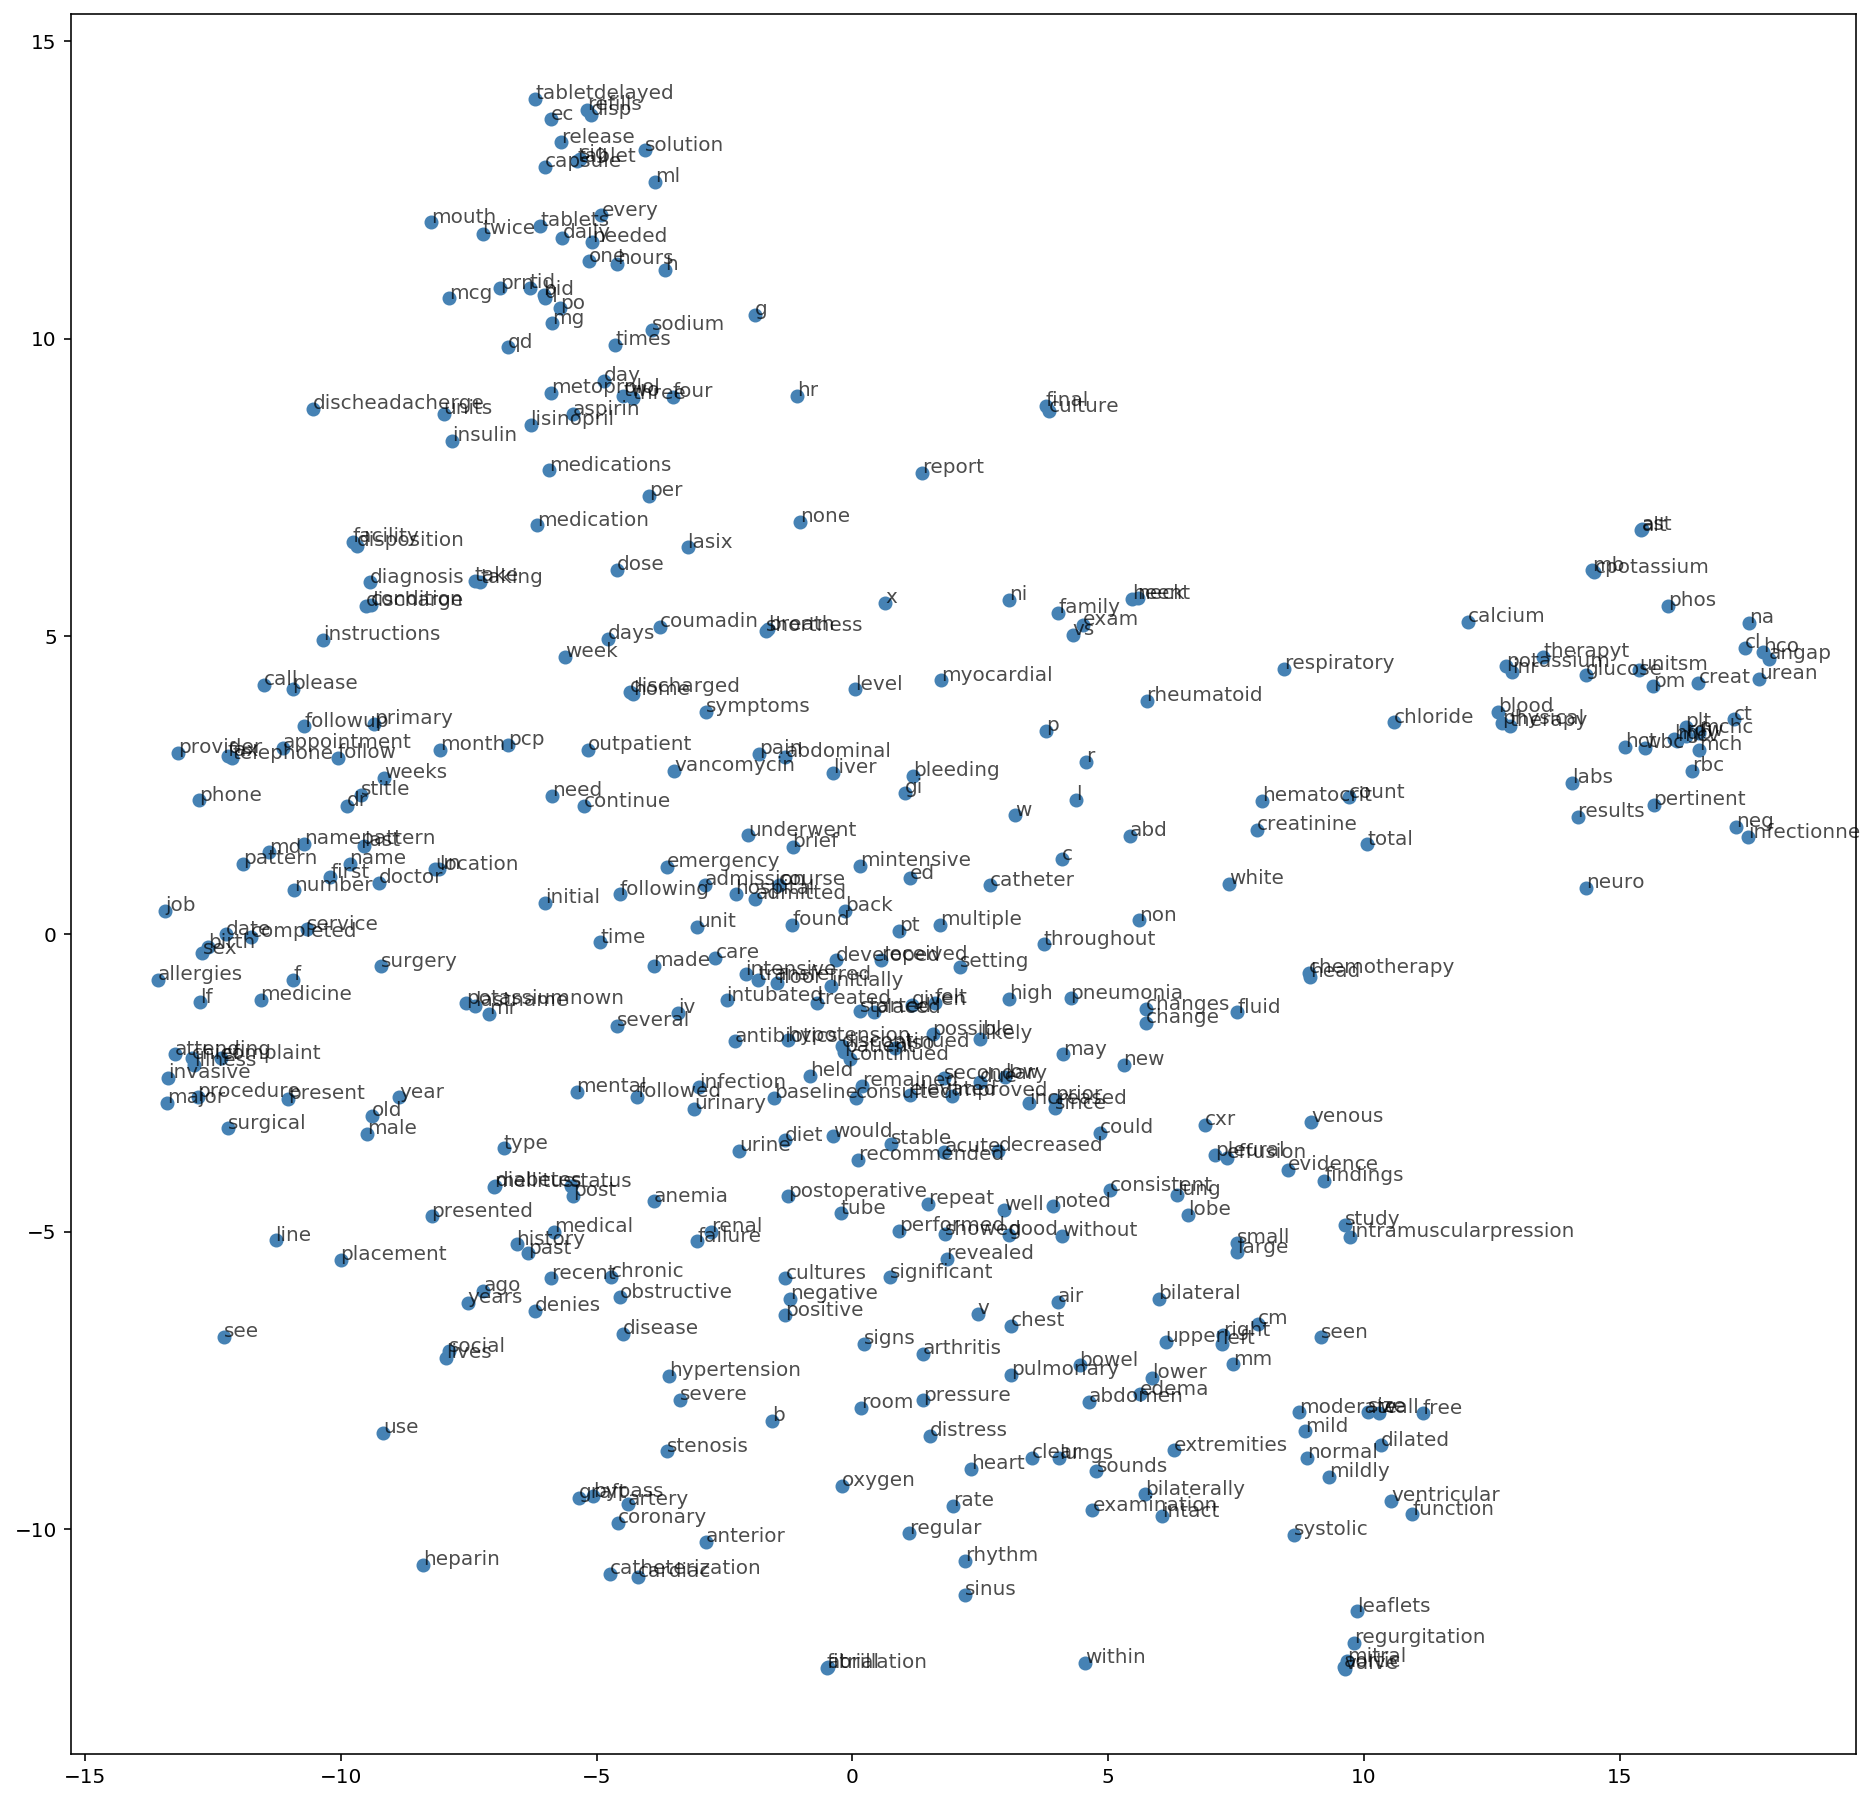

In [27]:
fig, ax = plt.subplots(figsize=(16, 16))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

In [ ]:
tqdm.pandas(desc="progress-bar")
# Associating the tags(labels) with numbers
tags_index = {'A': 1 , 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}
#Reading the file
#using perread file
df['narrative'].apply(lambda x: len(x.split(' '))).sum()
train, test = train_test_split(filteredWords, test_size=0.3, random_state=42)
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['filteredWords']), tags=[A]), axis=1)


In [ ]:
cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores, alpha=0.025, min_alpha=0.001)
#model_dbow.build_vocab([x for x in tqdm(filteredWords)])
train_documents  = utils.shuffle(filteredWords)
model_dbow.train(train_documents,total_examples=len(train_documents), epochs=30)
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors
model_dbow.save('./movieModel.d2v')

In [5]:
# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [6]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9684 sha256=a3e82e1571dff14cdee4bd9eb7859cd21961d5245d542b849b2a324e44ed9061
  Stored in directory: c:\users\afam\appdata\local\pip\cache\wheels\a1\b6\7c\0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


You should consider upgrading via the 'c:\users\afam\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
import wget
import os

print('Downloading dataset...')

# The URL for the dataset zip file.
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

# Download the file (if we haven't already)
if not os.path.exists('./cola_public_1.1.zip'):
    wget.download(url, './cola_public_1.1.zip')

In [8]:
# Unzip the dataset (if we haven't already)
if not os.path.exists('./cola_public/'):
    !unzip cola_public_1.1.zip

Archive:  cola_public_1.1.zip
   creating: cola_public/
  inflating: cola_public/README      
   creating: cola_public/tokenized/
  inflating: cola_public/tokenized/in_domain_dev.tsv  
  inflating: cola_public/tokenized/in_domain_train.tsv  
  inflating: cola_public/tokenized/out_of_domain_dev.tsv  
   creating: cola_public/raw/
  inflating: cola_public/raw/in_domain_dev.tsv  
  inflating: cola_public/raw/in_domain_train.tsv  
  inflating: cola_public/raw/out_of_domain_dev.tsv  


In [9]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 8,551



,sentence_source,label,label_notes,sentence
2325,l-93,1,NaN,The judge presented the winner with a prize.
3153,l-93,1,NaN,Sharon shivered at the thought of the cold sea.
7626,sks13,1,NaN,There seems to be a nurse available.
7870,ad03,1,NaN,Which book are you reading?
3557,ks08,1,NaN,"John sang a song, Mary played the piano."
4174,ks08,0,*,One people was dying of thirst.
3720,ks08,1,NaN,I need to have that report on our web page by ...
1014,bc01,1,NaN,Two students speak each language.
4826,ks08,1,NaN,To protect him is not an easy task.
7242,sks13,1,NaN,That the visiting team won the race could surp...


In [10]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]


,sentence,label
308,This is the problem that you'll beat the compe...,0
6817,George built the houses both.,0
5418,Harry got to be as much of the celebrity as hi...,0
3371,We abandoned from the area.,0
6768,"When never had Sir Thomas been so offended, Mr...",0


In [11]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [20]:
# Print the original sentence.
print(' Original: ', final[0:100])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(final[0:100]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(final[0:100])))

 Original:  textadmission date discharge date service attention deficit disorderendum rheumatoid arthritisdiolog
Tokenized:  ['text', '##ad', '##mission', 'date', 'discharge', 'date', 'service', 'attention', 'deficit', 'disorder', '##end', '##um', 'r', '##he', '##uma', '##to', '##id', 'arthritis', '##dio', '##log']
Token IDs:  [3793, 4215, 25481, 3058, 11889, 3058, 2326, 3086, 15074, 8761, 10497, 2819, 1054, 5369, 12248, 3406, 3593, 27641, 20617, 21197]


In [25]:
max_len = 0
sentences = final[0:100000]
# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  3


In [34]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels=[0,1,2]
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  t
Token IDs: tensor([ 101, 1056,  102,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

In [37]:
model.cpu()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [38]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [39]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 10

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [41]:

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [42]:

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [43]:

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

NameError: name 'time' is not defined

## Elmo


In [5]:
from sklearn.datasets import fetch_20newsgroups
#from sklearn.model_selection import train_test_split

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

train_raw_df = fetch_20newsgroups(subset='train', categories=categories)
test_raw_df = fetch_20newsgroups(subset='test', categories=categories)

x_train, x_val, y_train, y_val = train_test_split(np.array(train_raw_df.data), train_raw_df.target, test_size=0.1)
x_test = np.array(test_raw_df.data)
y_test = test_raw_df.target

# x_train = [x_train[:200] for x in x_train]

print('Train:', len(x_train))
print('Val:', len(x_val))
print('Test:', len(x_test))

Train: 2031
Val: 226
Test: 1502


In [6]:
%reload_ext  autoreload
%autoreload 2

ModuleNotFoundError: No module named ' autoreload'

In [ ]:
pip install autoreload2

In [10]:
import sys, os
tfhub_dir = '/data/jupyter/common/model/text/tfhub'
def add_aion(curr_path=None):
    if curr_path is None:
        dir_path = os.getcwd()
        target_path = os.path.dirname(dir_path)
        if target_path not in sys.path:
            print('Added %s into sys.path.' % (target_path))
            sys.path.insert(0, target_path)
            
add_aion()

In [13]:
import sys, os
aion_dir = 'the/path/of/aion/'
sys.path.insert(0, aion_dir)

add_aion()

In [8]:
vocab = set()
for sentence in x_train:
    tokens = sentence.split(' ')
    for token in tokens:
        vocab.add(token)

vocab_size = len(vocab)
print('Vocab Size: %d' % (vocab_size))

Vocab Size: 105073


In [15]:
max_sentence_length = 80
word2Idx = {'<padding>': 0, '<unknown>': 1}
idx2word = {0: '<padding>', 1: '<unknown>'}

def preprocess(text, word2Idx, idx2word, training=False):
    if training:
        for sentence in text:
            tokens = sentence.split(' ')

            for token in tokens:
                if token not in word2Idx:
                    word2Idx[token] = len(word2Idx)
                    idx2word[len(word2Idx)-1] = token


    word_vectors = np.zeros((len(text), max_sentence_length))
    sentence_vectors = []
    
    for i, sentence in enumerate(text):
        ids = []
        words = []
        tokens = sentence.split(' ')
        for token in tokens:
            if token in word2Idx:
                ids.append(word2Idx[token])
                words.append(token)
            else:
                ids.append(word2Idx['<unknown>'])
                words.append('<unknown>')
                
            if len(ids) >= max_sentence_length:
                break

        for i in range(max_sentence_length - len(ids)):
            ids.append(word2Idx['<padding>'])
            words.append('<padding>')

        word_vectors[i] = np.asarray(ids)
        sentence_vectors.append(' '.join(words))

    sentence_vectors = np.asarray(sentence_vectors)
    
    return word2Idx, idx2word, word_vectors, sentence_vectors

word2Idx, idx2word, x_train_words, x_train_sentences = preprocess(
    text=x_train, word2Idx=word2Idx, idx2word=idx2word, training=True)
print('x_train_words.shape:', x_train_words.shape)

word2Idx, idx2word, x_test_words, x_test_sentences = preprocess(
    text=x_test, word2Idx=word2Idx, idx2word=idx2word, training=False)
print('x_test_words.shape:', x_test_words.shape)

x_train_words.shape: (2031, 80)
x_test_words.shape: (1502, 80)


In [14]:
from aion.embeddings.elmo import ELMoEmbeddings

import tensorflow as tf
from keras import backend as K
from keras.layers import Input, Lambda, Dense, Embedding, BatchNormalization, Concatenate, LSTM
from keras.models import Model

elmo_embs = ELMoEmbeddings(layer='elmo', verbose=20)
elmo_embs.load(dest_dir=tfhub_dir)

ModuleNotFoundError: No module named 'aion'

In [ ]:
pip install aion.embeddings.elmo

In [ ]:
#download the model to local so it can be used again and again
!mkdir module/module_elmo2
# Download the module, and uncompress it to the destination folder. 
!curl -L "https://tfhub.dev/google/elmo/2?tf-hub-format=compressed" | tar -zxvC module/module_elmo2

In [ ]:
#download the model to local so it can be used again and again
!mkdir module/module_elmo2

In [25]:
#download the model to local so it can be used again and again
directory = "module_elmo2"
  
# Parent Directory path
parent_dir = r"C:\Users\Afam\Desktop\Machine Learning\module"
  
# Path
path = os.path.join(parent_dir, directory)
  
# Create the directory
# 'GeeksForGeeks' in
# '/home / User / Documents'
os.mkdir(path)
print("Directory '%s' created" %directory)
  

# Download the module, and uncompress it to the destination folder. 
#!curl -L "https://tfhub.dev/google/elmo/2?tf-hub-format=compressed" | tar -zxvC module/module_elmo2
#Downloaded and extracted manually

Directory 'module_elmo2' created


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0tar: Error opening archive: Failed to open '\\.\tape0'

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0  331M    0  4493    0     0   6328      0 15:14:18 --:--:-- 15:14:18  6328
curl: (23) Failed writing body (2317 != 2714)


In [ ]:
elmo = hub.Module("module/module_elmo2/", trainable=False)
embeddings = elmo(
["the cat is on the mat", "what are you doing in evening"],
signature="default",
as_dict=True)["elmo"]
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embeddings)

In [4]:
pip install tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Afam\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn.model_selection import train_test_split

texts = full_text.tolist()
texts = [' '.join(t.split()[:max_len]) for t in texts]
texts = np.array(texts, dtype=object)[:, np.newaxis]

x_train, x_val, y_train, y_val = train_test_split(texts, y, random_state=1992, test_size=0.2)

In [23]:
# -*- coding: utf-8 -*-
"""Custom layer for ELMO for keras
@license Copyright Sebastian Correa Echeverri
@author  scorrea
"""
import tensorflow as tf
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K
import tensorflow_hub as hub


class ElmoEmbeddingLayer(Layer):
    def __init__(self, **kwargs):
        self.dimensions = 1024
        self.trainable = True
        super(ElmoEmbeddingLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.elmo = hub.Module('https://tfhub.dev/google/elmo/2', trainable=self.trainable,
                               name="{}_module".format(self.name))
        super(ElmoEmbeddingLayer, self).build(input_shape)

    def call(self, x, mask=None):
        result = self.elmo(
            K.squeeze(K.cast(x, tf.string), axis=1),
            as_dict=True,
            signature='default',
            )['default']
        return result

    def compute_mask(self, inputs, mask=None):
        return K.not_equal(inputs, '--PAD--')

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dimensions)

In [ ]:
#from elmo_layer import ElmoEmbeddingLayer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense,
    Dropout
)


num_classes = 1
batch_size = 512
epochs = 200
learnRate = 0.001
#fname=os.path.join("clinicalInput.txt")
Input = np.array(int_words)
input_text = Input(shape=(1,), dtype="string", name='input_0')
x = ElmoEmbeddingLayer(trainable=False)(input_text)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation="sigmoid")(x)

model = Model(inputs=[input_text], outputs=x)

model.summary()

# 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [17]:
def build_model(): # uses crf from keras_contrib
    input = layers.Input(shape=(1,), dtype=tf.string)
    model = ElmoEmbeddingLayer(name='ElmoEmbeddingLayer')(input)
    model = Bidirectional(LSTM(units=512, return_sequences=True))(model)
    crf = CRF(num_tags)
    out = crf(model)
    model = Model(input, out)
    model.compile(optimizer="rmsprop", loss=crf_loss, metrics=[crf_accuracy, categorical_accuracy, mean_squared_error])
    model.summary()
    return model

In [ ]:
build_model()


In [ ]:

model.summary()

# 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [28]:
pwd

'C:\\Users\\Afam\\Desktop\\Machine Learning'